In [1]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import multiprocessing

from glob import glob
from PIL import Image

import cv2

In [2]:
def add_leading_zeros(number):
    return str(number).zfill(6)

In [3]:
def get_id(path):
    return path.split('/')[-1].replace('.png', '')

In [4]:
def get_age(path):
    return df_age.loc[int(path.split('/')[-1].replace('.png', '')), 'age']

In [5]:
def get_gender(path):
    return df_gender.loc[int(path.split('/')[-1].replace('.png', '')), 'gender']

In [6]:
def plot_images(filenames, num_rows, num_cols): 
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_rows*2,num_cols*2))
    axs = axs.ravel()
    
    for i in range(num_rows * num_cols):
        if i < len(filenames):
            img = mpimg.imread(filenames[i])
            axs[i].imshow(img)
            axs[i].set_title(get_id(filenames[i]) + " " + ("M" if get_gender(filenames[i]) else "F") + " " + str(get_age(filenames[i])) + "yo")
            axs[i].axis('off')
        else:
            axs[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [7]:
test_folder = '/home/doshi.mee/csye7105_project/dataset/SPR X-Ray Images/kaggle/kaggle/test/'
train_folder = '/home/doshi.mee/csye7105_project/dataset/SPR X-Ray Images/kaggle/kaggle/train/'

train_age_csv = '/home/doshi.mee/csye7105_project/dataset/SPR X-Ray Images/train_age.csv'
train_gender_csv = '/home/doshi.mee/csye7105_project/dataset/SPR X-Ray Images/train_gender.csv'

In [8]:
df_age = pd.read_csv(train_age_csv)

In [9]:
df_age['imageId'] = df_age['imageId'].apply(add_leading_zeros)
df_age.to_csv(train_age_csv, index = False)

In [10]:
df_age_up = pd.read_csv(train_age_csv, dtype = {'imageId': str})

In [11]:
# Age Dataframe Info
print("Age Info:")
print(df_age_up.head())

Age Info:
  imageId   age
0  000000  89.0
1  000001  72.0
2  000002  25.0
3  000003  68.0
4  000004  37.0


In [12]:
# Age Datatypes Info
print("Data Types:")
print(df_age_up.dtypes)

Data Types:
imageId     object
age        float64
dtype: object


In [13]:
# Age Missing Values
print("\nMissing Values:")
print(df_age_up.isnull().sum())


Missing Values:
imageId    0
age        0
dtype: int64


In [14]:
# Summary of Age Dataframe
print("\nSummary Statistics of Age:")
print(df_age_up['age'].describe())


Summary Statistics of Age:
count    10702.000000
mean        50.650813
std         18.969602
min         18.000000
25%         34.000000
50%         48.000000
75%         68.000000
max         89.000000
Name: age, dtype: float64


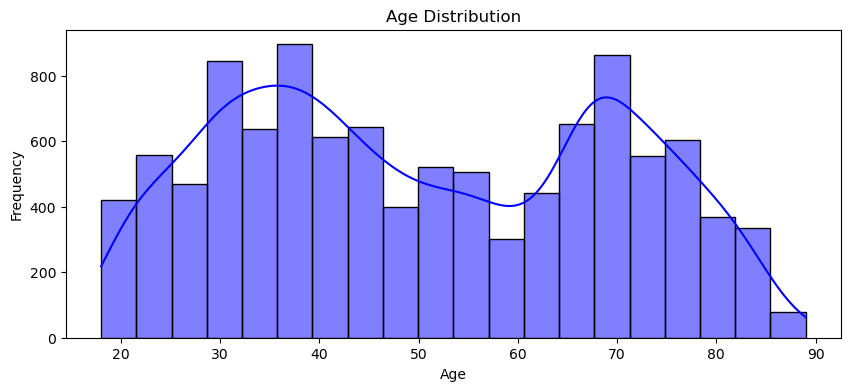

In [15]:
# Age distribution
plt.figure(figsize = (10, 4))
sns.histplot(df_age_up['age'], bins = 20, kde = True, color = 'blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

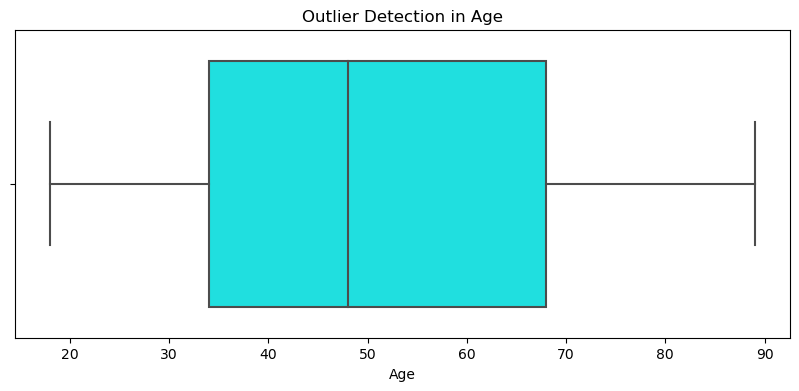

In [16]:
# Identify and visualize outliers in age
plt.figure(figsize = (10, 4))
sns.boxplot(x = 'age', data = df_age_up, color = 'cyan')
plt.title('Outlier Detection in Age')
plt.xlabel('Age')
plt.show()

In [17]:
df_gender = pd.read_csv(train_gender_csv)

In [18]:
df_gender['imageId'] = df_gender['imageId'].apply(add_leading_zeros)
df_gender.to_csv(train_gender_csv, index = False)

In [19]:
df_gender_up = pd.read_csv(train_gender_csv, dtype = {'imageId': str})

In [20]:
# Gender Dataframe Info
print("Gender Info:")
print(df_gender.head())

Gender Info:
  imageId  gender
0  000000       0
1  000001       0
2  000002       1
3  000003       1
4  000004       0


In [21]:
# Gender Datatypes Info
print("Data Types:")
print(df_gender.dtypes)

Data Types:
imageId    object
gender      int64
dtype: object


In [22]:
# Gender Missing Values
print("\nMissing Values:")
print(df_gender.isnull().sum())


Missing Values:
imageId    0
gender     0
dtype: int64


In [23]:
# Summary of Gender Dataframe
print("\nSummary Statistics of Gender:")
print(df_gender['gender'].describe())


Summary Statistics of Gender:
count    10702.000000
mean         0.419828
std          0.493554
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64


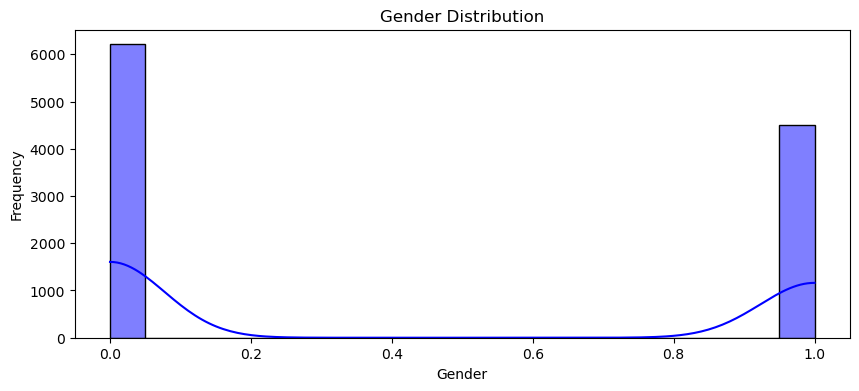

In [24]:
# Gender distribution
plt.figure(figsize = (10, 4))
sns.histplot(df_gender['gender'], bins = 20, kde = True, color = 'blue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

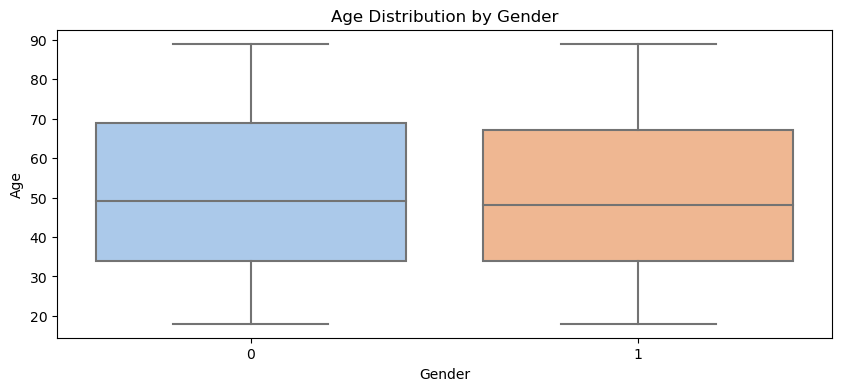

In [25]:
# Merge datasets on 'image_id'
age_gender = pd.merge(df_age, df_gender, on = 'imageId')

# Boxplot of age distribution by gender
plt.figure(figsize = (10, 4))
sns.boxplot(x = 'gender', y = 'age', data = age_gender, palette = 'pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

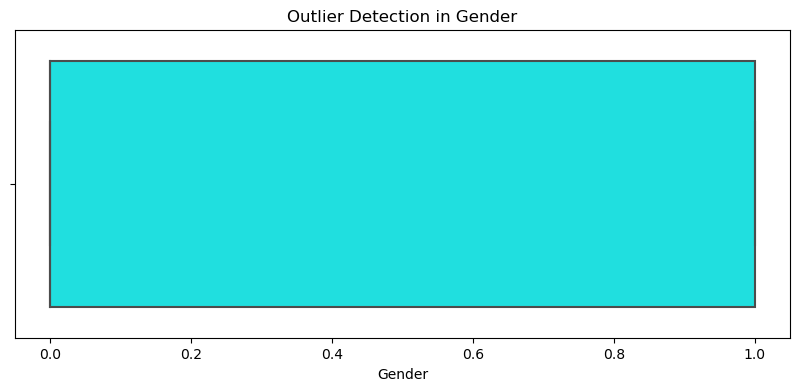

In [26]:
# Identify and visualize outliers in gender
plt.figure(figsize = (10, 4))
sns.boxplot(x = 'gender', data = df_gender, color = 'cyan')
plt.title('Outlier Detection in Gender')
plt.xlabel('Gender')
plt.show()

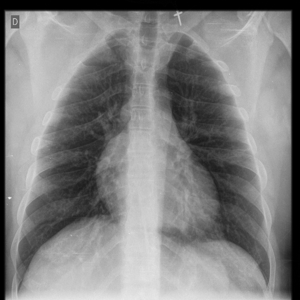

In [27]:
samp_image = Image.open(f'{train_folder}/000017.png')
samp_image.resize((300, 300))

In [28]:
train_files = glob(train_folder + "*.png")
print(len(train_files))

10702


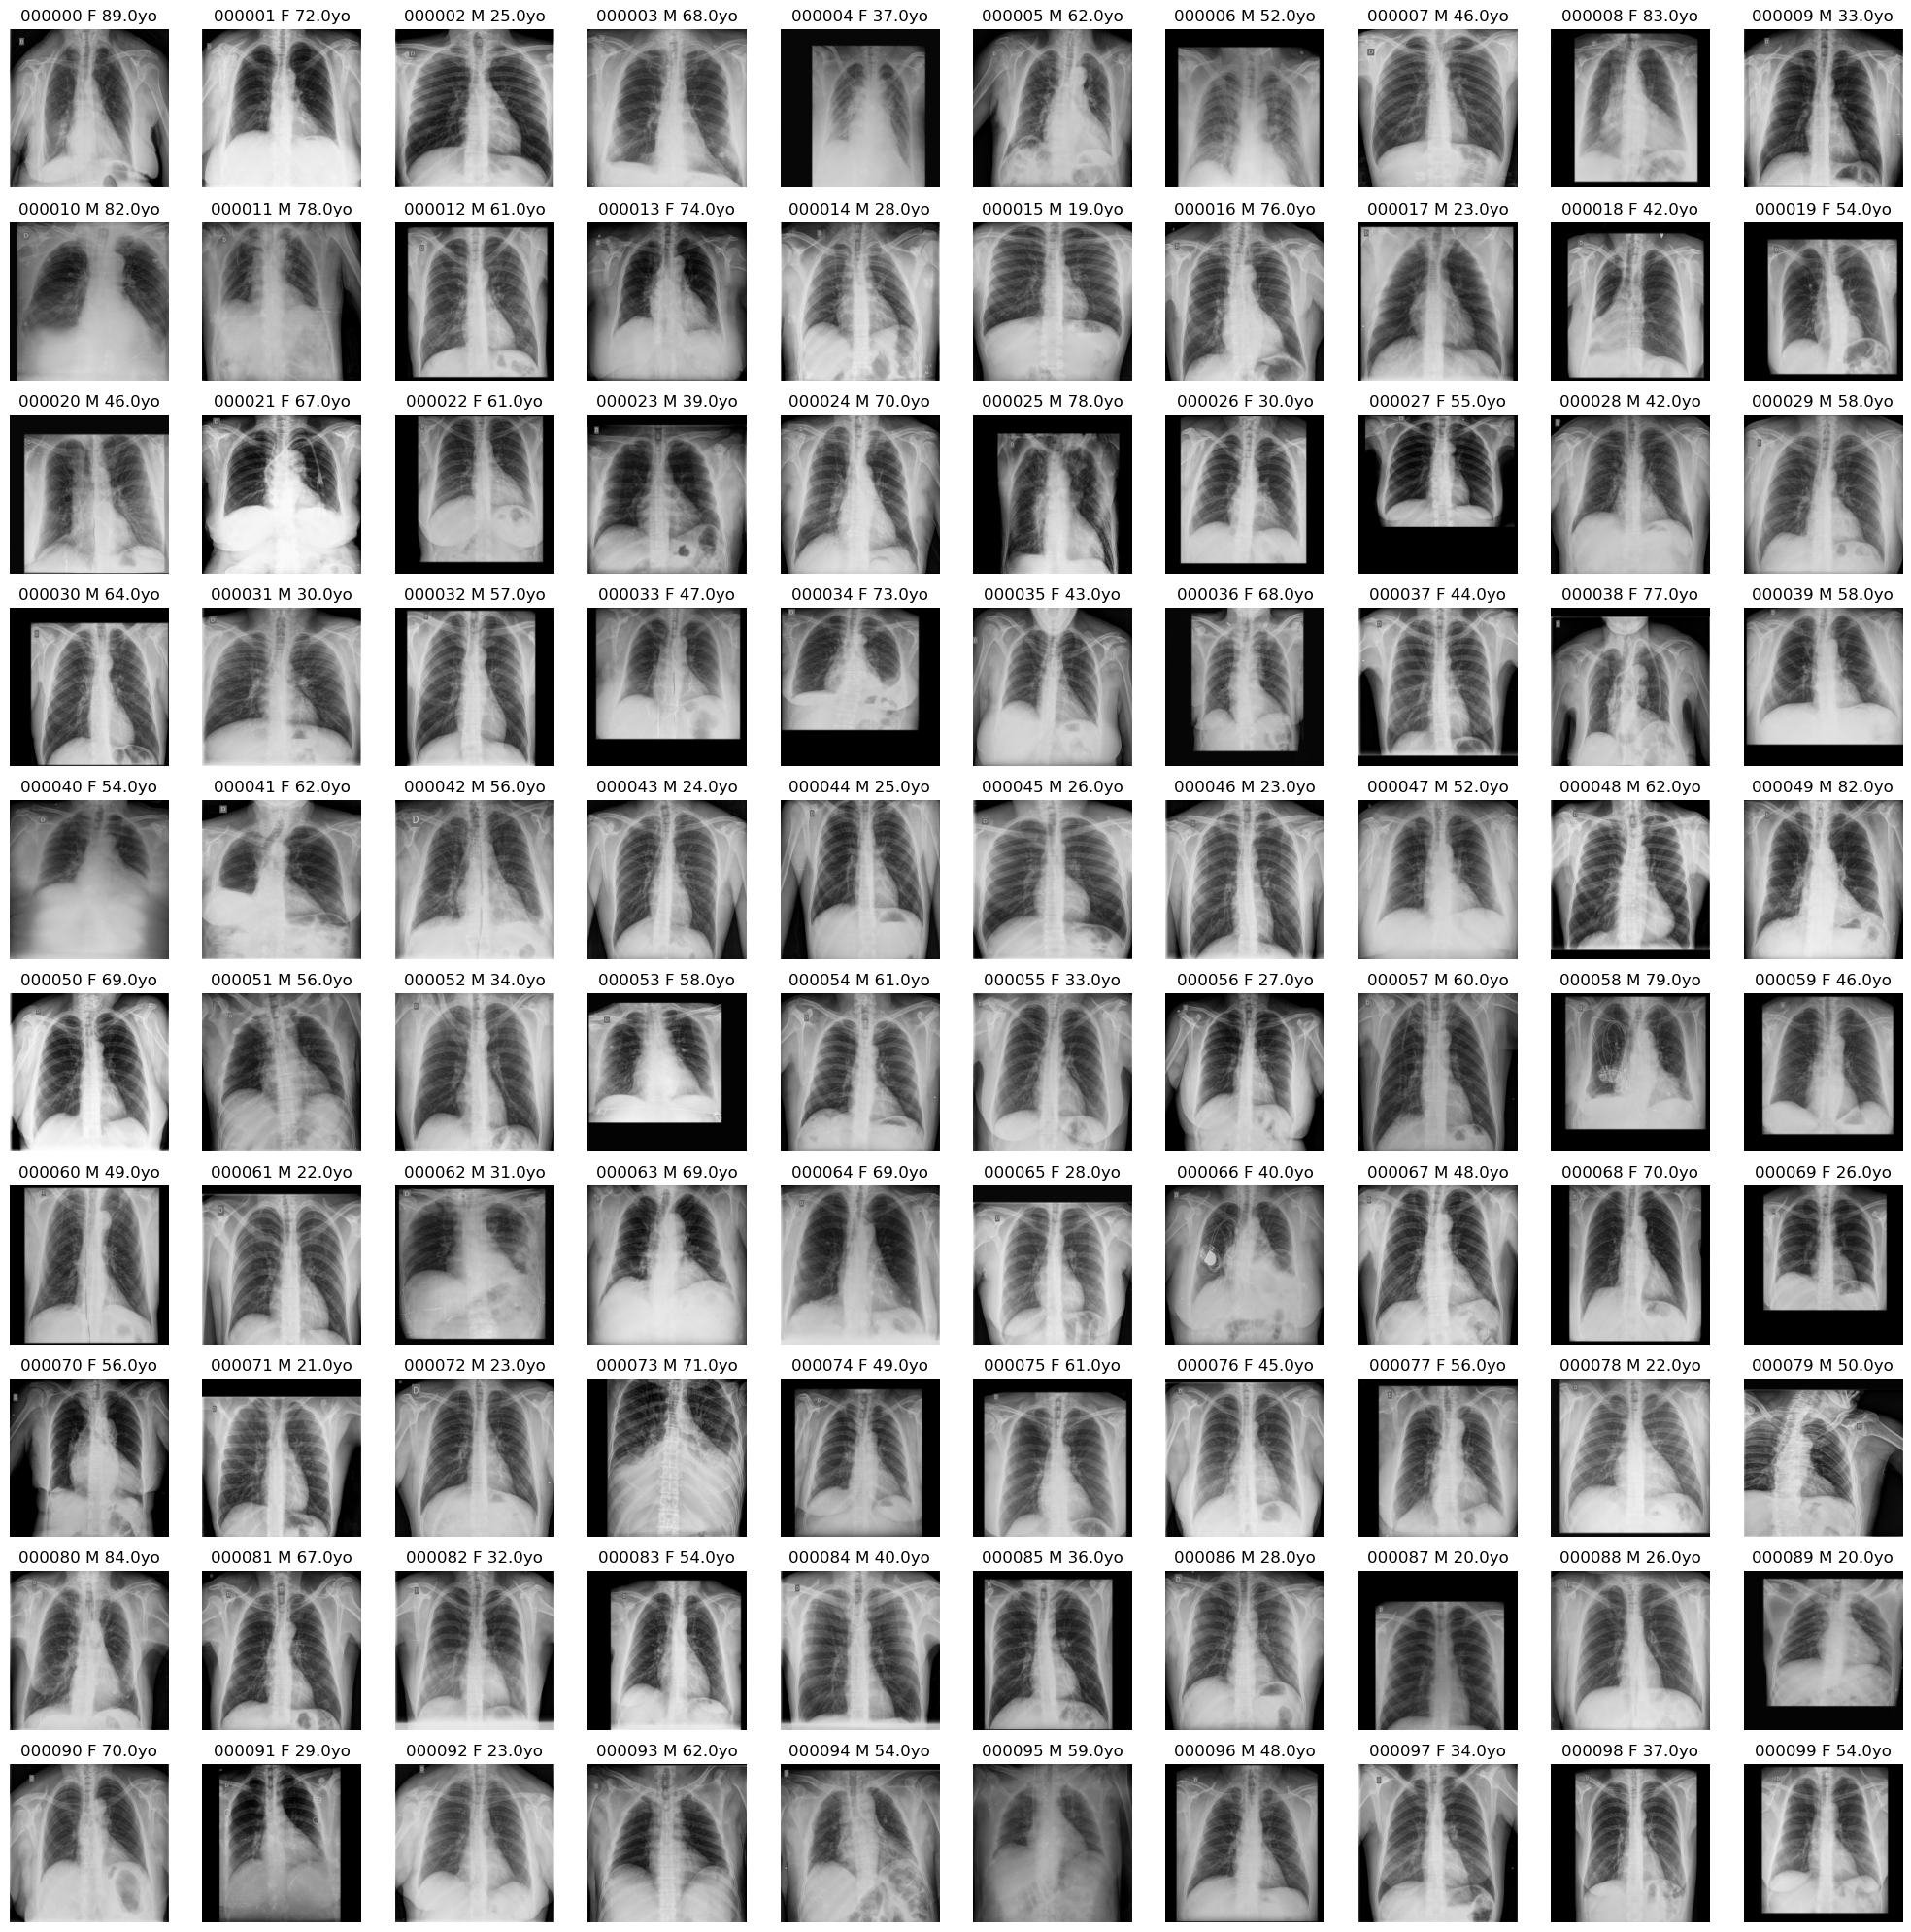

In [29]:
plot_images(train_files, 10, 10)